In [5]:
import cddm_data_simulation as ddm_sim
import scipy as scp
import tensorflow as tf
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import random
#import kde_class
import multiprocessing as mp
import psutil
import pickle 
import os
import re

import kde_training_utilities as kde_util
import kde_class as kde
import boundary_functions as bf

In [18]:
# Simulate from Standard DDM
my_samples = ddm_sim.ddm(v = 0, 
                         a = 1, 
                         w = 0.5, 
                         ndt = 0.5,
                         s = 1,
                         delta_t = 0.01,
                         max_t = 20,
                         n_samples = 30000,
                         print_info = True)

In [19]:
# Set up KDE 
my_log_kdes = kde.logkde(my_samples)
dat_eval = np.arange(0.0001, 3, 0.01)
dat_eval_len = len(dat_eval)

# Evaluations on positive and negative axes
evals_p1 = my_log_kdes.kde_eval(data = (dat_eval, 
                                        np.repeat(1, dat_eval_len)),
                                log_eval = False)

evals_m1 = my_log_kdes.kde_eval(data = (dat_eval, 
                                        np.repeat(-1, dat_eval_len)),
                               log_eval = False)


(array([1.61030700e-04, 1.61030700e-04, 0.00000000e+00, 1.61030700e-04,
        1.77133770e-03, 2.25442980e-03, 5.47504380e-03, 1.27214253e-02,
        3.52657233e-02, 6.94042317e-02, 1.68599143e-01, 3.91948724e-01,
        9.24799310e-01, 7.80032710e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.52012981e-01, 1.25136957e+00,
        5.90177515e-01, 2.55716751e-01, 1.07246446e-01, 4.47665346e-02,
        2.28663594e-02, 8.85668850e-03, 2.41546050e-03, 1.61030700e-03,
        8.05153500e-04, 3.22061400e-04]),
 array([-3.35999775, -3.15299788, -2.94599802, -2.73899815, -2.53199828,
        -2.32499842, -2.11799855, -1.91099869, -1.70399882, -1.49699895,
        -1.28999909, -1.08299922, -0.87599936, -0.66899949, -0.46199962,
        -0.25499976, -0.04799989,  0.15899998,  0.36599984,  0.57299971,
         0.77999957,  0.98699944,  1.19399931,  1.40099917,  1.60799904,
         1.8149989 ,  2.02199877,  2.22899864,  2.4359985 ,  2.64299837,
         2.84999

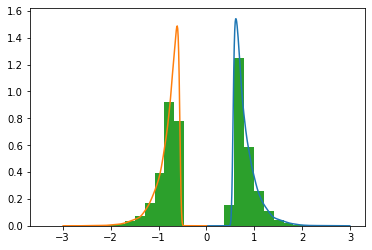

In [20]:
plt.plot(dat_eval, evals_p1)
plt.plot(-dat_eval, evals_m1)
plt.hist(my_samples[0] * my_samples[1], bins = 30, density = True)

In [ ]:
# Flexible 
v          0.532478
a          4.135571
w          0.332414
node       1.684656
theta      0.001445
rt        54.513734
choice    -1.000000

In [17]:
# Flexible bounds
# Simulations
process_params = {'v': 0.532478, 
                  'a': 4.135571, 
                  'w': 0.332413}

simulator_params = {'s': 1,
                    'delta_t': 0.01,
                    'max_t': 20, 
                    'n_samples': 3000,
                    'print_info': True}

boundary_params = {'boundary_fun': bf.linear_collapse, 
                   'boundary_multiplicative': False, 
                   'boundary_params':  {'node': 1.684656, 'theta': 0.001445}}

my_samples_flexb  = ddm_sim.ddm_flexbound_simulate(**process_params,
                                                   **simulator_params,
                                                   ** boundary_params)

0  datapoints sampled
1000  datapoints sampled
2000  datapoints sampled


In [16]:
my_samples_flexb[2]['max_t']

20

In [19]:
# Set up KDE 
my_log_kdes_flexb = kde.logkde(my_samples_flexb)
dat_eval = np.arange(0.0001, 5, 0.01)
dat_eval_len = len(dat_eval)

# Evaluations on positive and negative axes
evals_p1 = my_log_kdes_flexb.kde_eval(data = (dat_eval, 
                                        np.repeat(1, dat_eval_len)),
                                log_eval = False)

evals_m1 = my_log_kdes_flexb.kde_eval(data = (dat_eval, 
                                        np.repeat(-1, dat_eval_len)),
                               log_eval = False)

(array([0.00625, 0.00025, 0.00025, 0.00025, 0.00025, 0.00175, 0.00175,
        0.001  , 0.00075, 0.0015 , 0.00375, 0.004  , 0.0085 , 0.00825,
        0.00275, 0.     , 0.0085 , 0.045  , 0.07975, 0.091  , 0.09125,
        0.09075, 0.072  , 0.054  , 0.04175, 0.037  , 0.025  , 0.02225,
        0.01225, 0.03825]),
 array([-20.        , -18.66666667, -17.33333333, -16.        ,
        -14.66666667, -13.33333333, -12.        , -10.66666667,
         -9.33333333,  -8.        ,  -6.66666667,  -5.33333333,
         -4.        ,  -2.66666667,  -1.33333333,   0.        ,
          1.33333333,   2.66666667,   4.        ,   5.33333333,
          6.66666667,   8.        ,   9.33333333,  10.66666667,
         12.        ,  13.33333333,  14.66666667,  16.        ,
         17.33333333,  18.66666667,  20.        ]),
 <a list of 30 Patch objects>)

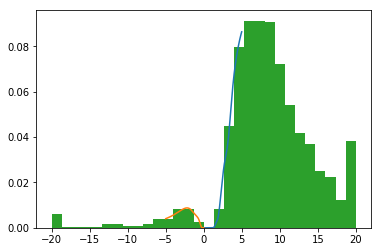

In [20]:
# Plot data and kde
plt.plot(dat_eval, evals_p1)
plt.plot(-dat_eval, evals_m1)
plt.hist(my_samples_flexb[0] * my_samples_flexb[1], bins = 30, density = True)

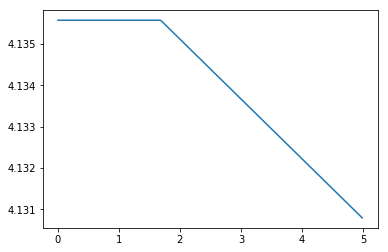

In [21]:
# Plot bound
t_s = np.arange(0, 5, 0.01)
boundary = np.zeros((len(t_s),2))
a = process_params['a']

cnt = 0
for i in t_s:
    b = a + bf.linear_collapse(t = i,
                               **boundary_params['boundary_params'])
    if b <= 0:
        boundary[cnt, 0] = 0
        boundary[cnt, 1] = 0
    else: 
        boundary[cnt, 0] = b
        boundary[cnt, 1] = - boundary[cnt, 0]
    cnt += 1

plt.plot(t_s, boundary[:, 0])
#plt.plot(t_s, boundary[:, 1]) 

In [ ]:
#kde_samples = 
kde_samples = my_log_kdes_flexb.kde_sample(n_samples = 10000)
plt.hist(kde_samples[0]*kde_samples[1], color = 'blue', alpha = 0.3, density = True, bins = 50)
plt.hist(my_samples_flexb[0] * my_samples_flexb[1], color = 'green', alpha = 0.3, density = True, bins = 50)
#plt.hist(my_samples[0], color = 'blue', alpha = 0.3, density = True, bins = 50)

In [ ]:
# Simulate: lca
# Get samples
my_samples_lca  = ddm_sim.lca(v = np.array([1, 0.5, 0.0, 0.0, 0.0], ndmin = 2).T,
                              w = np.array([0.0, 0.0, 0.0, 0.0, 0.0], ndmin = 2).T, 
                              a = 2,
                              b = 1.0,
                              g = 0.1,
                              s = 1.0,
                              delta_t = 0.001,
                              max_t = 20,
                              n_samples = 3000,
                              print_info = True)

In [ ]:
# Make kde 
choices = np.unique(my_samples_lca[1])
my_lca_kdes = kde_class.logkde()
my_lca_kdes.attach_data_from_simulator(simulator_data = my_samples_lca)
my_lca_kdes.generate_base_kdes()
evals = my_lca_kdes.kde_eval(where  = np.expand_dims(np.linspace(0.00001, 10, num = 500),
                                                     axis = 1), 
                             which = choices)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_trisurf(np.random.uniform(high=1, low = 0, size = 10000),
                np.random.uniform(high=1, low = 0, size = 10000),
                np.random.uniform(high=1, low = 0, size = 10000))

In [ ]:
from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)

cnt = 0
forensics_data = dict(v = [], a = [])
for file_ in file_list:
    sim_dat = pickle.load( open( from_folder + file_, "rb" ) )
    if np.sum(sim_dat[1] == 1) == 0 or np.sum(sim_dat[1] == -1) == 0:
        print('cnt', cnt)
        print('no data for some choice')
        print(sim_dat[2])
        forensics_data['v'].append(sim_dat[2]['v:'])
        forensics_data['a'].append(sim_dat[2]['a'])
        
#     print('count:', cnt)
#     print('c minus 1:', kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1]))
#     print('c 1:',kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == 1]))
    cnt += 1
    if cnt % 1000 == 0: 
        print('1000 files opened')
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)


#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1])

In [ ]:
#pickle.dump([1, 2, my_lca_kdes], open( "save.p", "wb" ) )


from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)

cnt = 0
forensics_data = dict(v = [], a = [])
for file_ in file_list:
    sim_dat = pickle.load( open( from_folder + file_, "rb" ) )
    sim_dat[2]['v'] = sim_dat[2]['v:']
    del sim_dat[2]['v:']
    sim_dat[2]['possible_choices'] = [-1., 1.]
    
    pickle.dump(sim_dat, open( from_folder + file_[:21] + '_' + file_[21:], "wb" ) )
    print(cnt)
    cnt += 1
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)


#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1])

In [ ]:
#pickle.dump([1, 2, my_lca_kdes], open( "save.p", "wb" ) )


from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)

cnt = 0
forensics_data = dict(v = [], a = [])
for file_ in file_list:
    char_cnt = 0
    for i in file_[::-1]:
        if i == '_':
            print(char_cnt)
            break
        char_cnt += 1
    
    if char_cnt == 41:
        os.remove(from_folder + file_)
        print('removed:', file_)
    else:
        print('kept:', file_)
#     sim_dat = pickle.load( open( from_folder + file_, "rb" ) )
#     sim_dat[2]['v'] = sim_dat[2]['v:']
#     del sim_dat[2]['v:']
#     sim_dat[2]['possible_choices'] = [-1., 1.]
    
#     pickle.dump(sim_dat, open( from_folder + file_[:21] + '_' + file_[21:], "wb" ) )
    
    print(cnt)
    cnt += 1
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)


#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1])